In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [252]:
data = pd.read_csv('Train.csv')

In [253]:
data.head()
data = data.values

In [254]:
print(data.shape)

(1600, 6)


In [255]:
X = data[:,:5]
Y = data[:,5]

In [256]:
print(X.shape,Y.shape)

(1600, 5) (1600,)


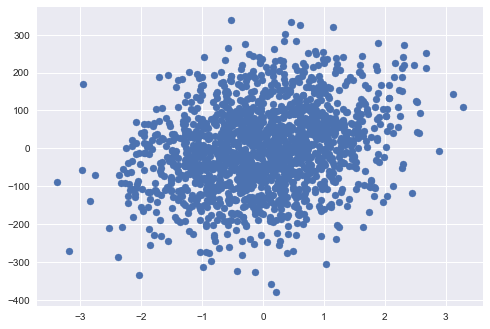

In [261]:
plt.style.use('seaborn')
plt.scatter(X[:,:1],Y)
plt.show()

In [262]:
ones = np.ones((X.shape[0],1))
ones.shape
X = np.hstack((ones,X))

In [263]:
def hypothesis(X,theta):
    return np.dot(X,theta)

    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    
    grad = np.dot(X.T,(y_-y))          
    m = X.shape[0]
    
    return grad/m


def error(X,y,theta):
    error = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    error = np.sum((y-y_)**2)
    return error/m


def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
    
    return theta,error_list

In [264]:
theta,Errorlist = gradient_descent(X,Y)

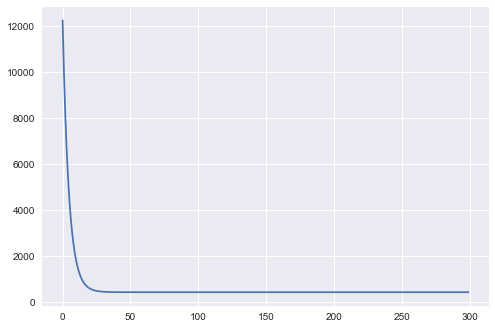

In [265]:
plt.plot(Errorlist)
plt.show()

[ 4.99096674 29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]


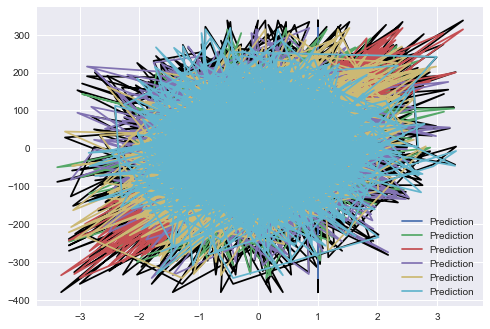

In [308]:
y_=hypothesis(X,theta)
print (theta)
plt.plot(X,Y,color="black")
plt.plot(X,y_,label="Prediction")
plt.legend()
plt.show()

In [309]:
X_test = pd.read_csv('Test.csv')

In [310]:
X_test.shape

(400, 5)

In [311]:
ones = np.ones((X_test.shape[0],1))
X_test= np.hstack((ones,X_test))
print(X_test.shape)

(400, 6)


In [320]:
print(theta)
np.transpose(theta) 
print(theta.shape)

[ 4.99096674 29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
(6,)


In [331]:
pred = np.dot(X_test,theta)

In [332]:
print(pred.shape)

(400,)


In [333]:
df = pd.DataFrame(pred, index = [i for i in range(pred.shape[0])], columns= ['target'])

In [334]:
df.index.name = 'Id'

In [335]:
df.head()

,target
Id,
0,114.583689
1,118.012815
2,-21.739852
3,-43.936899
4,-95.914898


In [330]:
df.to_csv('Submission.csv')